In [14]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt 

In [15]:
class exergy_fn():
    
    def nonflow(self,U,U0,T0,S,S0,P0,V,V0):
        return((U-U0)-T0*(S-S0)+P0*(V-V0))
    
    def flow(self,H,H0,T0,S,S0):
        return((H-H0)-T0*(S-S0))
    
    def work(self,W,t,P0,V1,V2):
        if t == 0:
            return W
        elif t == 1:
            return(W-(P0*(V2-V1)))
        else:
            raise ValueError("Error, Wrong Type!!")
        
    def heat(self,Q,TH,TL):
        return Q*(1-(TL/TH))
    
    def ke(self,V):
        return (V**2)/(2000)
    
    def po(self,Z1,Z2,g):
        return g*(Z1-Z2)/1000

exergy = exergy_fn()

In [16]:
#fig16
def basic(f,P2,T3,T1=298,x1=0,eta_p=0.85,eta_t=0.8):
    fluid = str(f)
    #1
    T1 = 298
    x1 = 0 
    s1 = CP.PropsSI('S', 'T', T1, 'Q', x1, fluid)
    h1 = CP.PropsSI('H', 'T', T1, 'Q', x1, fluid)
    P1 = CP.PropsSI('P', 'T', T1, 'Q', x1, fluid)
    #2
    s2 = s1
    P2 = 1000*P2
    h2s = CP.PropsSI('H', 'P', P2, 'S', s2, fluid)
    h2 = ((h2s-h1)/(eta_p))+h1
    T2 = CP.PropsSI('T', 'P', P2, 'H', h2, fluid)
    #3
    T3 = T3*1
    P3 = P2
    s3 = CP.PropsSI('S', 'T', T3, 'P', P3, fluid)
    h3 = CP.PropsSI('H', 'T', T3, 'P', P3, fluid)
    #4
    P4 = P1
    s4 = s3
    h4s = CP.PropsSI('H', 'P', P4, 'S', s4, fluid)
    h4 = h3-(h3-h4s)*eta_t
    #output
    Wnet = h1-h2+h3-h4
    eta_h = (Wnet)/(h3-h2)
    return Wnet,eta_h

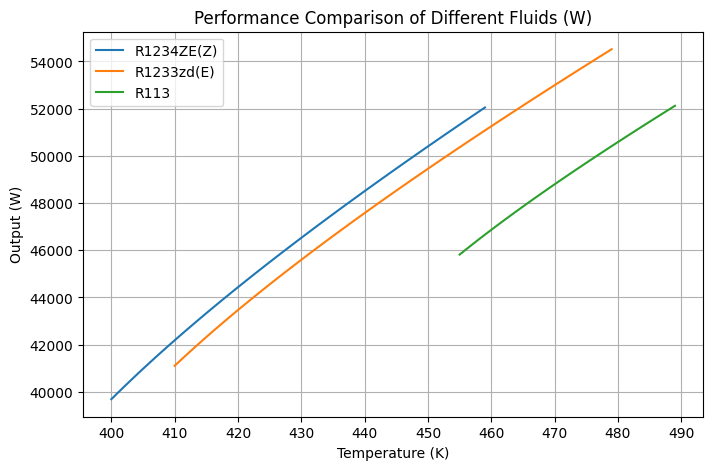

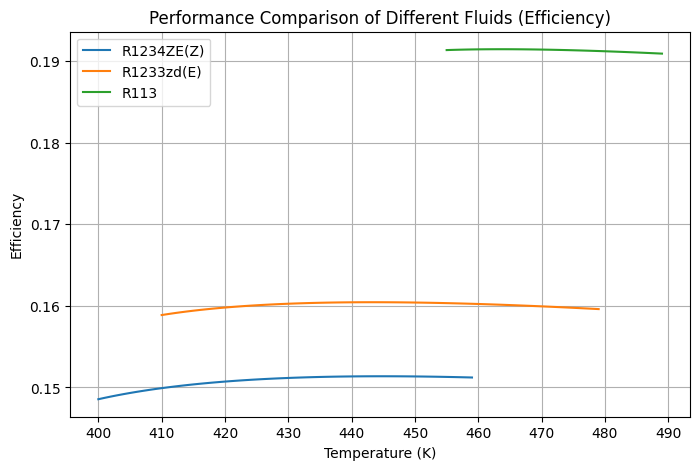

In [17]:
import numpy as np
import matplotlib.pyplot as plt

fluid = ["R1234ZE(Z)", "R1233zd(E)", "R113"]
temperature_ranges = {
    "R1234ZE(Z)": (400, 460),
    "R1233zd(E)": (410, 480),
    "R113": (455, 490)
}

W = []
etha = []#
all_temps = []  

for f in fluid:
    Ts, Te = temperature_ranges[f]  
    x = []
    y = []
    temps = np.arange(Ts, Te, 1)  
    for t in temps:
        x.append(basic(f, 2000, t)[0])  
        y.append(basic(f, 2000, t)[1])  
    W.append(np.array(x))
    etha.append(np.array(y))
    all_temps.append(temps)

plt.figure(figsize=(8, 5))
for i in range(len(fluid)):
    plt.plot(all_temps[i], W[i], label=fluid[i])

plt.xlabel("Temperature (K)")
plt.ylabel("Output (W)")  
plt.legend()
plt.grid()
plt.xticks(np.arange(400, 500, 10))  
plt.title("Performance Comparison of Different Fluids (W)")
plt.show()

plt.figure(figsize=(8, 5))
for i in range(len(fluid)):
    plt.plot(all_temps[i], etha[i], label=fluid[i])

plt.xlabel("Temperature (K)")
plt.ylabel("Efficiency")  
plt.legend()
plt.grid()
plt.xticks(np.arange(400, 500, 10))
plt.title("Performance Comparison of Different Fluids (Efficiency)")
plt.show()


In [18]:
def basic2(P2,fluid,T0=297,P0=101325,T1=298,x1=0):
    
    fluid = str(fluid)
    s0 = CP.PropsSI('S', 'T', T0, 'P', P0, fluid)
    h0 = CP.PropsSI('H', 'T', T0, 'P', P0, fluid)
    P0 = CP.PropsSI('P', 'T', T0, 'P', P0, fluid)

    s1 = CP.PropsSI('S', 'T', T1, 'Q', x1, fluid)
    h1 = CP.PropsSI('H', 'T', T1, 'Q', x1, fluid)
    P1 = CP.PropsSI('P', 'T', T1, 'Q', x1, fluid)

    s2 = s1
    h2s = CP.PropsSI('H', 'P', P2, 'S', s2, fluid)

    h2 = ((h2s-h1)/(0.85))+h1
    T2 = CP.PropsSI('T', 'P', P2, 'H', h2, fluid)
    s2 = CP.PropsSI('S', 'P', P2, 'H', h2, fluid)
    wp = h1-h2

    XDp = -exergy.work(wp,0,0,0,0)+(exergy.flow(h1,h0,T0,s1,s0)-exergy.flow(h2,h0,T0,s2,s0))
    P3 = P2
    T3 = CP.PropsSI('T', 'P', P3, 'Q', 1, fluid)
    s3 = CP.PropsSI('S', 'Q', 1, 'P', P3, fluid)
    h3 = CP.PropsSI('H', 'Q', 1, 'P', P3, fluid)
    qe = h3-h2

    XDe = exergy.heat(qe,T3+15,T0)+(exergy.flow(h2,h0,T0,s2,s0)-exergy.flow(h3,h0,T0,s3,s0))
    P4 = P1
    s4i = s3
    h4s = CP.PropsSI('H', 'P', P4, 'S', s4i, fluid)
    h4 = h3-(h3-h4s)*0.80
    s4 = CP.PropsSI('S', 'P', P4, 'H', h4, fluid)
    wt = h3-h4

    XDt = -(wt)+(exergy.flow(h3,h0,T0,s3,s0)-exergy.flow(h4,h0,T0,s4,s0))
    XDc = exergy.heat(qe,T1-15,T0)+(exergy.flow(h4,h0,T0,s4,s0)-exergy.flow(h1,h0,T0,s1,s0))
    qc = h1-h4
    XDc = exergy.heat(qc,T1-15,T0)+(exergy.flow(h4,h0,T0,s4,s0)-exergy.flow(h1,h0,T0,s1,s0))
    
    return [XDp,XDe,XDt,XDc,wp,wt,qc,qe,T1-15,T3+15]

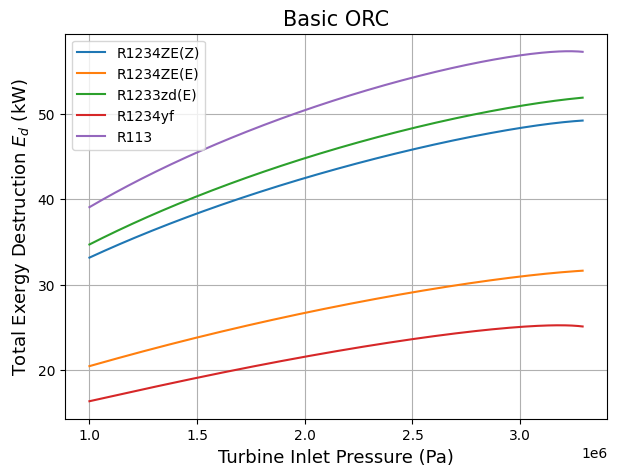

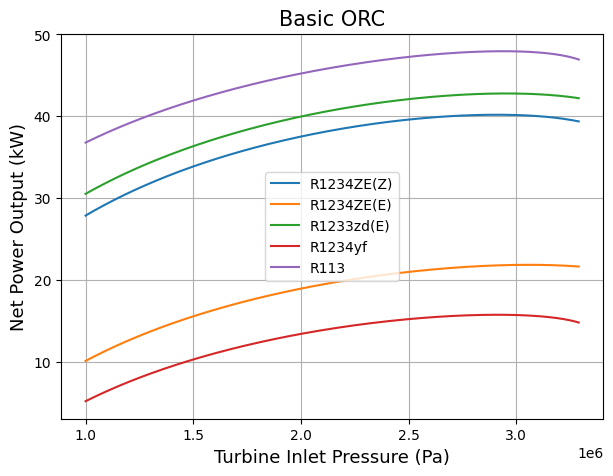

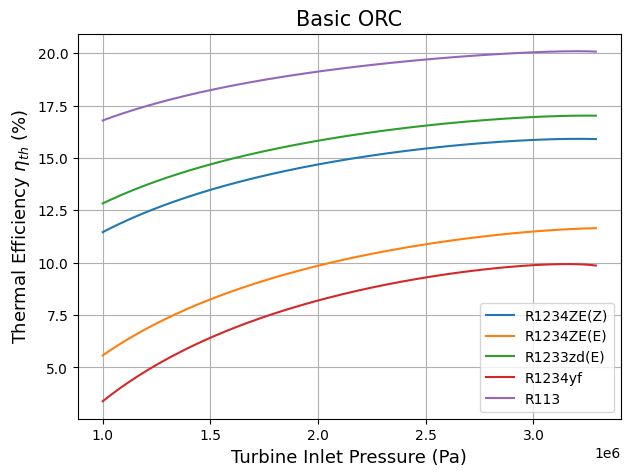

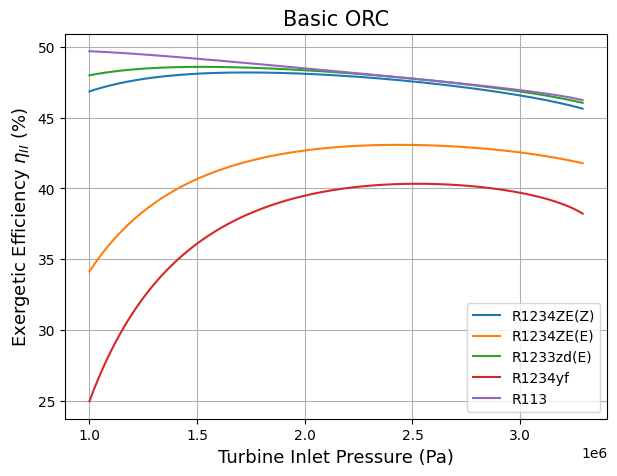

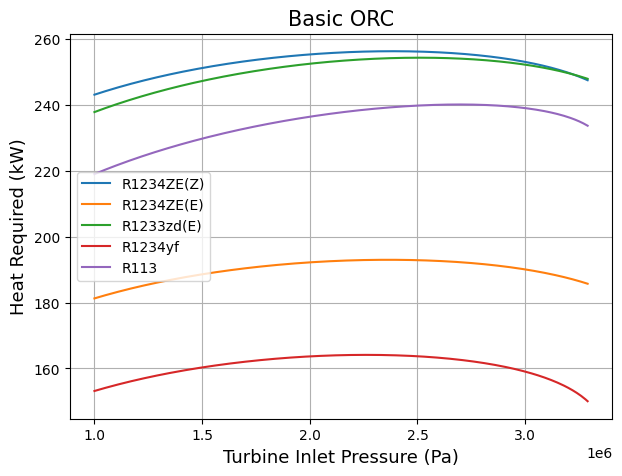

In [19]:
def plot_basic_orc_properties(fluid_list, pressure_range, basic2_func):
    properties = {
        'Total Exergy Destruction $E_{d}$ (kW)': lambda E: np.sum(E[:4])/1000,
        'Net Power Output (kW)': lambda E: np.sum(E[4:6]) / 1000,
        'Thermal Efficiency $\eta_{th}$ (%)': lambda E: 100 * (np.sum(E[4:6]) / E[7]),
        'Exergetic Efficiency $\eta_{II}$ (%)': lambda E: 100 * (np.sum(E[4:6]) / (E[7] * (1 - (E[8] / E[9])))),
        'Heat Required (kW)': lambda E: E[7] / 1000
    }
    
    for prop_name, prop_func in properties.items():
        plt.figure(figsize=(7, 5))
        for fluid in fluid_list:
            y = []
            for p in pressure_range:
                E = basic2_func(p, fluid)
                y.append(prop_func(E))
            plt.plot(pressure_range, y, label=fluid)
        
        plt.legend()
        plt.grid()
        plt.xlabel('Turbine Inlet Pressure (Pa)', fontsize=13)
        plt.ylabel(prop_name, fontsize=13)
        plt.title('Basic ORC', fontsize=15)
        plt.show()

fluid_list = ["R1234ZE(Z)", "R1234ZE(E)", "R1233zd(E)", "R1234yf", "R113"]
pressure_range = np.arange(int(1000e3), int(3300e3), 10000)

plot_basic_orc_properties(fluid_list, pressure_range, basic2)

In [20]:
def basic3(P4,fluid,T0=297,P0=101325,T7=298,x7=0,x4=1,x2=0):
    # T0 = 297
    # P0 = 101325
    # fluid = 'R1233zd(E)'
    s0 = CP.PropsSI('S', 'T', T0, 'P', P0, fluid)
    h0 = CP.PropsSI('H', 'T', T0, 'P', P0, fluid)
    P0 = CP.PropsSI('P', 'T', T0, 'P', P0, fluid)

    #7
    # m = (1-y)m
    # T7 = 298
    # x7 = 0 
    s7 = CP.PropsSI('S', 'T', T7, 'Q', x7, fluid)
    h7 = CP.PropsSI('H', 'T', T7, 'Q', x7, fluid)
    P7 = CP.PropsSI('P', 'T', T7, 'Q', x7, fluid)


    #4
    # m = m
    # P4 = 1000e3
    # x4 = 1 
    s4 = CP.PropsSI('S', 'P', P4, 'Q', x4, fluid)
    h4 = CP.PropsSI('H', 'P', P4, 'Q', x4, fluid)
    T4 = CP.PropsSI('T', 'P', P4, 'Q', x4, fluid)
    #5
    P6 = P7
    P5 = np.sqrt(P4*P6)
    s5i = s4
    h5s = CP.PropsSI('H', 'P', P5, 'S', s5i, fluid)
    h5 = h4-(h4-h5s)*0.80
    s5 = CP.PropsSI('S', 'P', P5, 'H', h5, fluid)
    T5 = CP.PropsSI('T', 'P', P5, 'H', h5, fluid)

    #6
    # m = (1-y)m
    s6i = s5
    P6 = P7
    h6s = CP.PropsSI('H', 'P', P6, 'S', s6i, fluid)
    h6 = h5-(h5-h6s)*0.80
    s6 = CP.PropsSI('S', 'P', P6, 'H', h6, fluid)
    T6 = CP.PropsSI('T', 'P', P6, 'H', h6, fluid)
    #1
    # m = (y)m
    P1 = P5 
    s1i =s7
    h1s = CP.PropsSI('H', 'P', P1, 'S', s1i, fluid)
    h1 = ((h1s-h7)/(0.85))+h7
    s1 = CP.PropsSI('S', 'P', P1, 'H', h1, fluid)
    T1 = CP.PropsSI('T', 'P', P1, 'H', h1, fluid)
    #2
    # m = m
    # x2=0
    P2 = P5
    h2 = CP.PropsSI('H', 'P', P2, 'Q', x2, fluid)
    s2 = CP.PropsSI('S', 'P', P2, 'Q', x2, fluid)
    T2 = CP.PropsSI('T', 'P', P2, 'Q', x2, fluid)

    y = (h2-h1)/(h5-h1)
    #3
    # m = m
    P3 = P4
    s3i = s2
    h3s = CP.PropsSI('H', 'P', P3, 'S', s3i, fluid)
    h3 = ((h3s-h2)/(0.85))+h2
    s3 = CP.PropsSI('S', 'P', P3, 'H', h3, fluid)
    T3 = CP.PropsSI('T', 'P', P3, 'H', h3, fluid)
    
    
    qc = h7-h6
    XDc = (exergy.heat(qc,T7-15,T0)+(exergy.flow(h6,h0,T0,s6,s0)-exergy.flow(h7,h0,T0,s7,s0)))*(1-y)
    
    wtHP = h4-h5
    XDtHP = -(wtHP)+(exergy.flow(h4,h0,T0,s4,s0)-exergy.flow(h5,h0,T0,s5,s0))
    wtLP = (h5-h6)*(1-y)
    XDtLP = -(wtLP)+(exergy.flow(h5,h0,T0,s5,s0)-exergy.flow(h6,h0,T0,s6,s0))*(1-y)

    wpI = h7-h1
    XDpI = (-exergy.work(wpI,0,0,0,0)+(exergy.flow(h7,h0,T0,s7,s0)-exergy.flow(h1,h0,T0,s1,s0)))*(1-y)

    wpII = h2-h3
    XDpII = -exergy.work(wpII,0,0,0,0)+(exergy.flow(h2,h0,T0,s2,s0)-exergy.flow(h3,h0,T0,s3,s0))
    qe = h4-h3

    XDe = exergy.heat(qe,T4+15,T0)+(exergy.flow(h3,h0,T0,s3,s0)-exergy.flow(h4,h0,T0,s4,s0))

    XDf = (exergy.flow(h5,h0,T0,s5,s0)*y)+(exergy.flow(h1,h0,T0,s1,s0)*(1-y))-exergy.flow(h2,h0,T0,s2,s0)
    
    return [XDc,XDtHP,XDtLP,XDpI,XDpII,XDf,XDe,wtHP,wtLP,wpI,wpII,qc,qe,T4+15,T7-15]


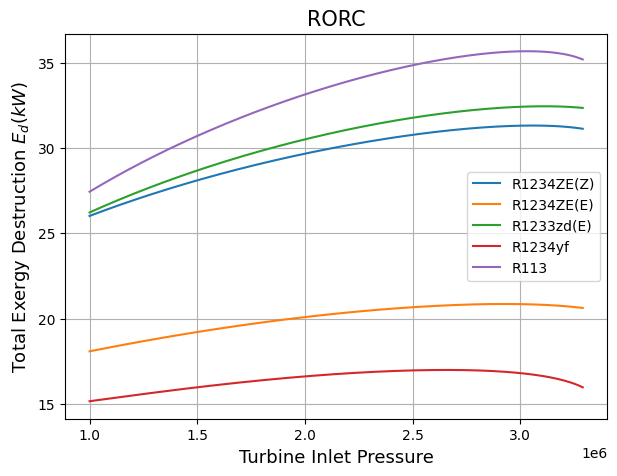

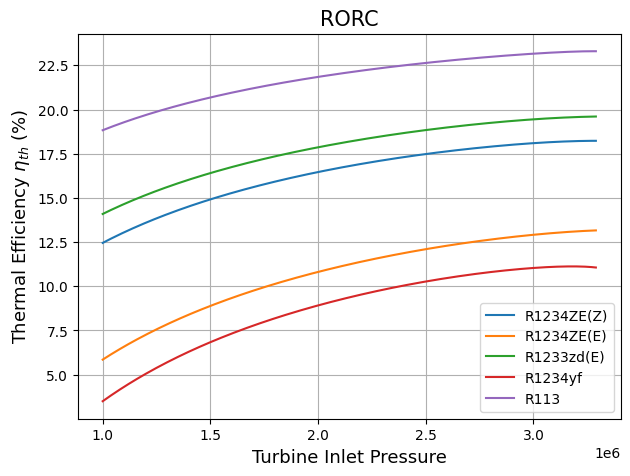

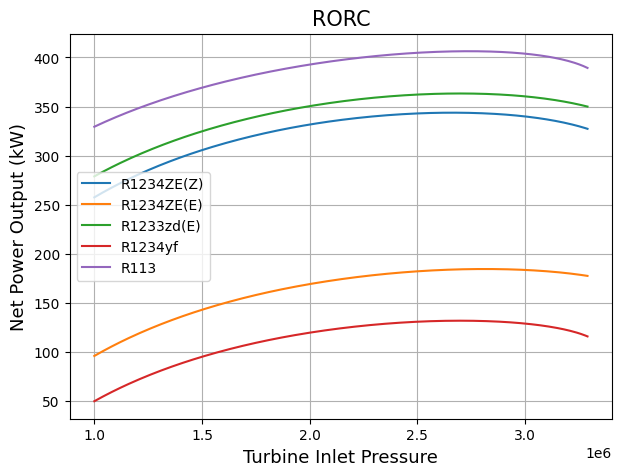

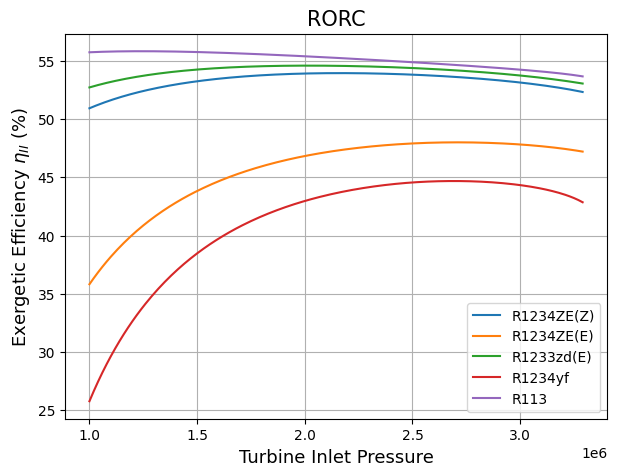

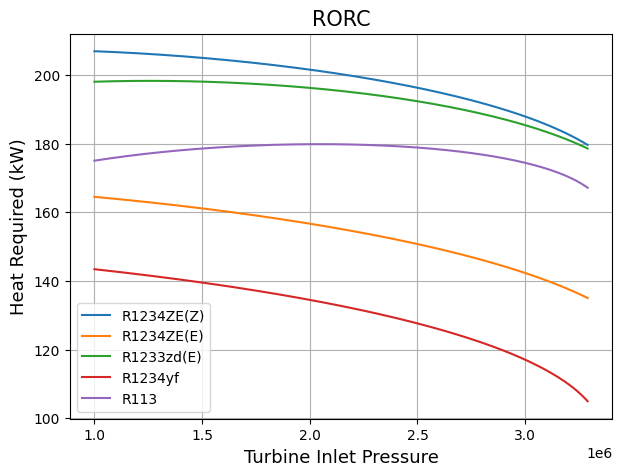

In [21]:
def plot_rorc_properties(fluid_list, pressure_range, basic3_func):
    properties = {
        'Total Exergy Destruction $E_{d} (kW)$': lambda E: np.sum(E[:7])/1000,
        'Thermal Efficiency $\eta_{th}$ (%)': lambda E: 100 * (np.sum(E[7:11]) / E[12]),
        'Net Power Output (kW)': lambda E: np.sum(E[7:11])/100,
        'Exergetic Efficiency $\eta_{II}$ (%)': lambda E: 100 * (np.sum(E[7:11]) / (E[12] * (1 - (E[14] / E[13])))),
        'Heat Required (kW)': lambda E: E[12] / 1000
    }
    
    for prop_name, prop_func in properties.items():
        plt.figure(figsize=(7, 5))
        for fluid in fluid_list:
            y = []
            for p in pressure_range:
                E = basic3_func(p, fluid)
                y.append(prop_func(E))
            plt.plot(pressure_range, y, label=fluid)
        
        plt.legend()
        plt.grid()
        plt.xlabel('Turbine Inlet Pressure', fontsize=13)
        plt.ylabel(prop_name, fontsize=13)
        plt.title('RORC', fontsize=15)
        plt.show()

fluid_list = ["R1234ZE(Z)", "R1234ZE(E)", "R1233zd(E)", "R1234yf", "R113"]
pressure_range = np.arange(int(1000e3), int(3300e3), 10000)

plot_rorc_properties(fluid_list, pressure_range, basic3)

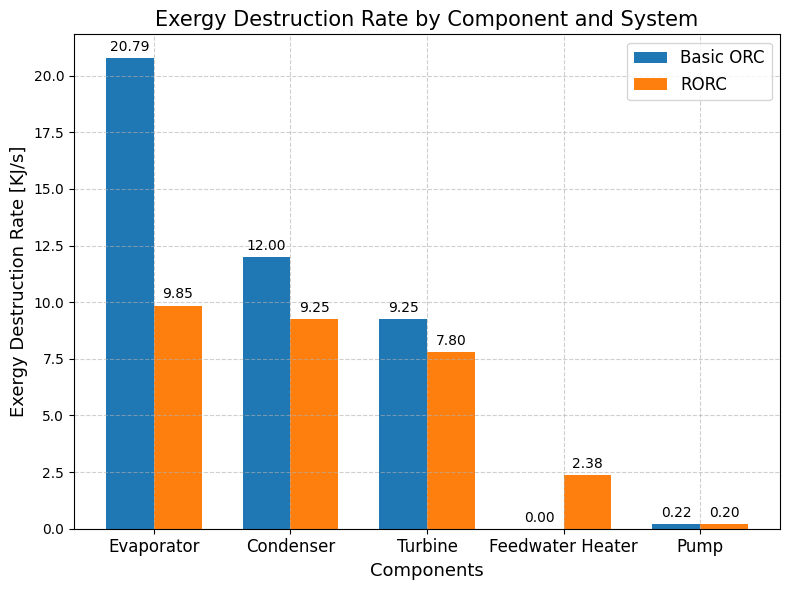

In [22]:
XDc = []
XDt = []
XDp = []
XDe = []
XDf = []
p = 1.7e6
fluid = "R1233zd(E)"

XDp.append(basic2(p,fluid)[0]/1000)
XDe.append(basic2(p,fluid)[1]/1000)
XDt.append(basic2(p,fluid)[2]/1000)
XDc.append(basic2(p,fluid)[3]/1000)
XDf.append(0)

XDc.append(basic3(p,fluid)[0]/1000)
XDt.append((basic3(p,fluid)[1]/1000)+(basic3(p,fluid)[2]/1000))
XDp.append((basic3(p,fluid)[3]/1000)+(basic3(p,fluid)[4]/1000))
XDf.append(basic3(p,fluid)[5]/1000)
XDe.append(basic3(p,fluid)[6]/1000)

x = [XDp,XDe,XDt,XDc,XDf]

x = [XDp, XDe, XDt, XDc, XDf] 
labels = ['Evaporator', 'Condenser', 'Turbine', 'Feedwater Heater', 'Pump']
basic_orc = [x[1][0], x[3][0], x[2][0], x[4][0], x[0][0]]  # Basic ORC values
rorc = [x[1][1], x[3][1], x[2][1], x[4][1], x[0][1]]  # RORC values

x_axis = np.arange(len(labels))
width = 0.35  
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x_axis - width/2, basic_orc, width, label='Basic ORC')
rects2 = ax.bar(x_axis + width/2, rorc, width, label='RORC')

ax.set_xlabel('Components', fontsize=13)
ax.set_ylabel('Exergy Destruction Rate [KJ/s]', fontsize=13)
ax.set_title('Exergy Destruction Rate by Component and System', fontsize=15)
ax.set_xticks(x_axis)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Basic ORC - Fluid: R1233zd(E)')

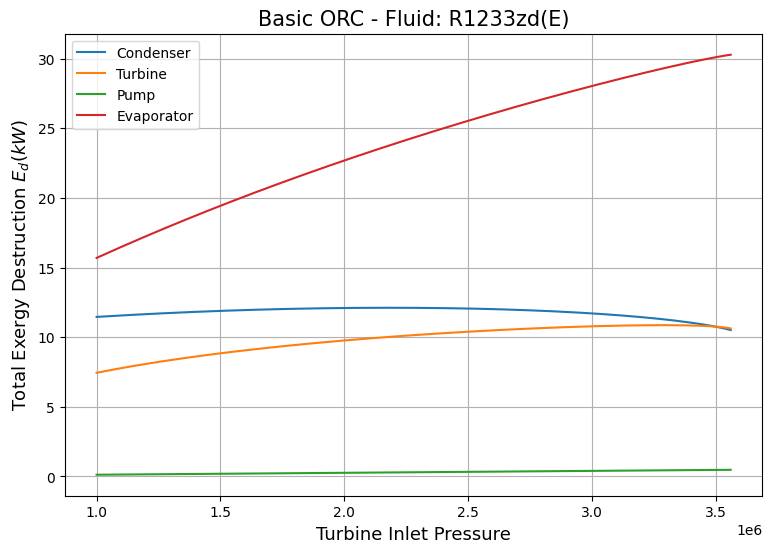

In [23]:
ranges = np.arange(int(1000e3),int(3570e3),10000)
XDc=[]
XDt=[]
XDp=[]
XDe=[]
fluid = 'R1233zd(E)'

for p in ranges:
    XDp.append(basic2(p,fluid)[0]/1000)
    XDe.append(basic2(p,fluid)[1]/1000)
    XDt.append(basic2(p,fluid)[2]/1000)
    XDc.append(basic2(p,fluid)[3]/1000)

plt.figure(figsize=(9,6))
plt.plot(ranges,XDc,label='Condenser')
plt.plot(ranges,XDt,label='Turbine')
plt.plot(ranges,XDp,label='Pump')
plt.plot(ranges,XDe,label='Evaporator')
plt.grid()
plt.legend()
plt.xlabel('Turbine Inlet Pressure',fontsize = 13)
plt.ylabel('Total Exergy Destruction $E_{d} (kW)$',fontsize = 13)
plt.title(f'Basic ORC - Fluid: {fluid}',fontsize = 15)

Text(0.5, 1.0, 'RORC - Fluid: R1233zd(E)')

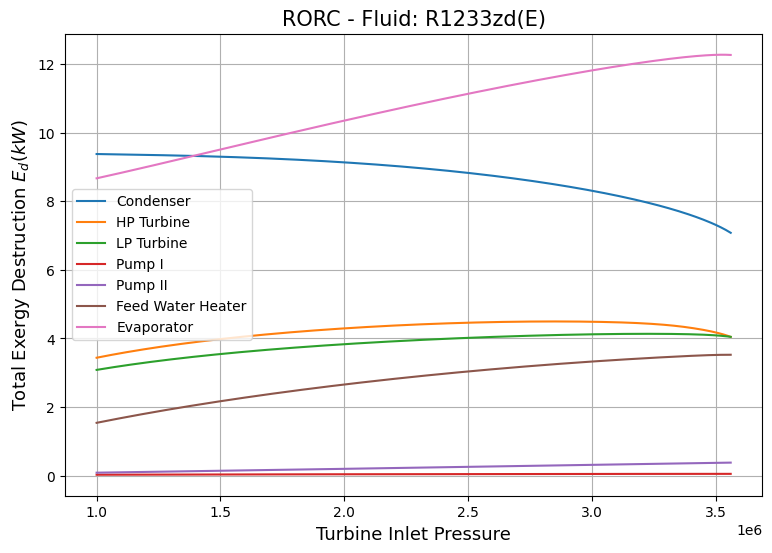

In [24]:
ranges = np.arange(int(1000e3),int(3570e3),10000)
XDc=[]
XDtHP=[]
XDtLP=[]
XDpI=[]
XDpII=[]
XDf=[]
XDe=[]
fluid = 'R1233zd(E)'

for p in ranges:
    XDc.append(basic3(p,fluid)[0]/1000)
    XDtHP.append(basic3(p,fluid)[1]/1000)
    XDtLP.append(basic3(p,fluid)[2]/1000)
    XDpI.append(basic3(p,fluid)[3]/1000)
    XDpII.append(basic3(p,fluid)[4]/1000)
    XDf.append(basic3(p,fluid)[5]/1000)
    XDe.append(basic3(p,fluid)[6]/1000)

plt.figure(figsize=(9,6))
plt.plot(ranges,XDc,label='Condenser')
plt.plot(ranges,XDtHP,label='HP Turbine')
plt.plot(ranges,XDtLP,label='LP Turbine')
plt.plot(ranges,XDpI,label='Pump I')
plt.plot(ranges,XDpII,label='Pump II')
plt.plot(ranges,XDf,label='Feed Water Heater')
plt.plot(ranges,XDe,label='Evaporator')
plt.grid()
plt.legend()
plt.xlabel('Turbine Inlet Pressure',fontsize = 13)
plt.ylabel('Total Exergy Destruction $E_{d} (kW)$',fontsize = 13)
plt.title(f'RORC - Fluid: {fluid}',fontsize = 15)

Text(0.5, 1.0, 'Validation - Working Fluid: R1234yf')

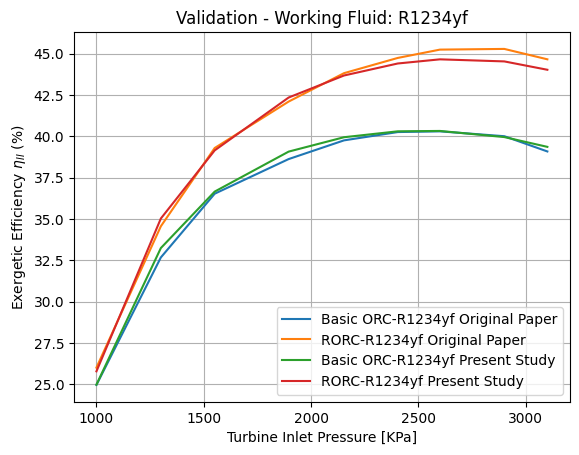

In [25]:
x = [1000,1300,1550.880952,1895.337302,2153.27381,2403.769841,2600.186508,2900.123016,3100.579365]
y = [24.95810056,32.66759777,36.52234637,38.61731844,39.74860335,40.25139665,40.29329609,40,39.07821229]
yy = [26.00558659217877,34.55307262569832,39.287709497206706,42.09497206703911, 43.81284916201117,44.73463687150838,45.237430167597765,45.279329608938546,44.650837988826815]
yyy = []
yyyy = []
for p in x:
    E = basic2(p*1000,'R1234yf')
    yyy.append( 100 * (np.sum(E[4:6]) / (E[7] * (1 - (E[8] / E[9])))))
    E = basic3(p*1000,'R1234yf')
    yyyy.append(100 * (np.sum(E[7:11]) / (E[12] * (1 - (E[14] / E[13])))))
plt.plot(x,y,label='Basic ORC-R1234yf Original Paper')
plt.plot(x,yy,label='RORC-R1234yf Original Paper')
plt.plot(x,yyy,label='Basic ORC-R1234yf Present Study')
plt.plot(x,yyyy,label='RORC-R1234yf Present Study')

plt.grid()
plt.legend()
plt.ylabel('Exergetic Efficiency $\eta_{II}$ (%)')
plt.xlabel('Turbine Inlet Pressure [KPa]')
plt.title('Validation - Working Fluid: R1234yf')


Text(0.5, 1.0, 'Validation - Working Fluid: R1234yf')

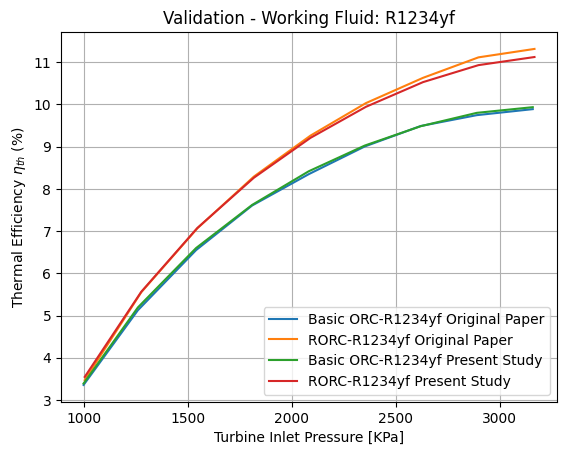

In [26]:
x = [1000, 1260.9890109890111, 1541.2087912087914, 1810.4395604395606, 2082.4175824175827, 2351.6483516483518, 2620.879120879121, 2890.1098901098903, 3159.3406593406594]
y = [3.3559201141226787, 5.1248216833095555, 6.551355206847358, 7.606990014265332, 8.348787446504993, 9.00499286733238, 9.490014265335233, 9.746790299572037, 9.889443651925816]
xx = [
    1005.4945054945056, 1277.4725274725274, 1546.7032967032967,
    1818.6813186813185, 2090.659340659341, 2357.1428571428573,
    2631.868131868132, 2898.3516483516487, 3167.5824175824173
]

yy = [
    3.4700427960057034, 5.552781740370897, 7.064907275320969,
    8.291726105563477, 9.261768901569184, 10.032097004279597,
    10.631241084165476, 11.11626248216833, 11.31597717546362
]

yyy = []
yyyy = []
for p in x:
    E = basic2(p*1000,'R1234yf')
    yyy.append( 100 * (np.sum(E[4:6]) / E[7]))
for p in xx:

    E = basic3(p*1000,'R1234yf')
    yyyy.append(100 * (np.sum(E[7:11]) / E[12]))
plt.plot(x,y,label='Basic ORC-R1234yf Original Paper')
plt.plot(xx,yy,label='RORC-R1234yf Original Paper')
plt.plot(x,yyy,label='Basic ORC-R1234yf Present Study')
plt.plot(xx,yyyy,label='RORC-R1234yf Present Study')

plt.grid()
plt.legend()
plt.ylabel('Thermal Efficiency $\eta_{th}$ (%)')
plt.xlabel('Turbine Inlet Pressure [KPa]')
plt.title('Validation - Working Fluid: R1234yf')